We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2021-07-15 13:29:29--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:2600:1d:d83a:40c0:93a1, 2600:9000:21c7:5800:1d:d83a:40c0:93a1, 2600:9000:21c7:f200:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:2600:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   
2020-12-12  46.0  1196.0  113.0  1.0  0.0  802.0   995.0  136.0  7112.0   
2020-12-13  52.0  1154.0  298.0  1.0  0.0  879.0  1013.0  100.0  5274.0   
2020-12-14  50.0  1194.0  746.0  0.0  0.0  788.0   357.0   27.0  3558.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  
2020-12-12  3026.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  205.0  1.0  1.0  
2020-12-13  2938.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  154.0  1.0  1.0  
2020-12-14  3005.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  170.0  1.0  0.0  

[350 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-12-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-12-10 NaN NaN NaN NaN NaN NaN NaN  
2021-12-11 NaN NaN NaN NaN NaN NaN NaN  
2021-12-12 NaN NaN NaN NaN NaN NaN NaN  
2021-12-13 NaN NaN NaN NaN NaN NaN NaN  
2021-12-14 NaN NaN NaN NaN NaN NaN NaN  

[715 rows x 428 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    715.000000
mean     357.000000
std      206.547008
min        0.000000
25%      178.500000
50%      357.000000
75%      535.500000
max      714.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [10]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = 2
#mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 2


# Iterate here

In [11]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

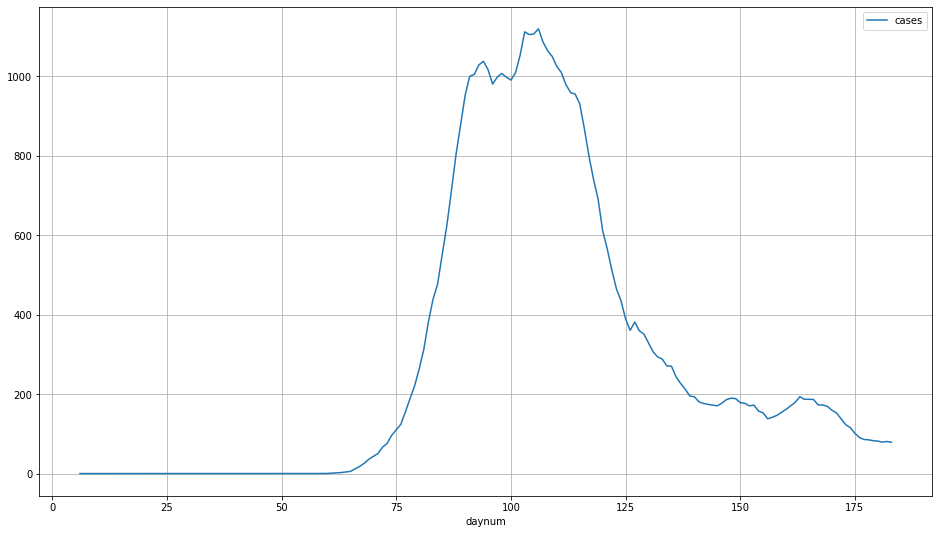

In [12]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()].loc['20200101':'20200701'].plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

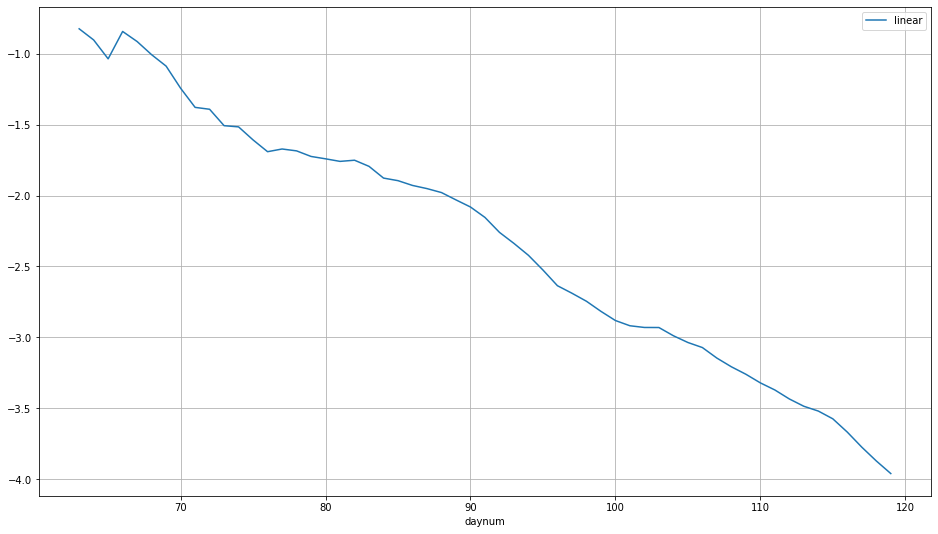

In [13]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred['gumdiv'])

df_pred = df_pred[(df_pred['linear'] < -0.4) &
                  (df_pred['linear'] > -4.0)]

df_pred.loc['20200101':'20200701'].plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

In [14]:
from pyearth import Earth

eax = df_pred['daynum'].values.reshape(-1, 1)
eay = df_pred['linear'].values.reshape(-1, 1)

#model = Earth()
#model = Earth(minspan=0)
model = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
model.fit(eax, eay)

print(model.trace())
print(model.summary())

df_pred['earth'] = model.predict(eax)

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_pred.loc['20200101':'20200701'].plot(x='daynum', y=['linear', 'earth'], figsize=(16, 9), grid=True)

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.814054  1      0.829  0.000  0.000  
1     0       0    56    0.024275  3      0.026  0.970  0.969  
2     0       0    98    0.017026  5      0.019  0.979  0.977  
3     0       0    58    0.010043  7      0.011  0.988  0.986  
4     0       0    82    0.004594  9      0.005  0.994  0.993  
5     0       0    25    0.003672  11     0.005  0.995  0.995  
6     0       0    11    0.002466  13     0.003  0.997  0.996  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
----------------------------------------------
iter  bf  terms  mse   gcv    rsq     grsq    
----------------------------------------------
0     -   13     0.00  0.003  0.997   0.996   
1     9   12     0.00  0.00

In [56]:
print(model.coef_)

[[-12.38513491   0.05975729  -0.12636427   0.07309645   0.02705505
   -0.03917872  -0.0234708    0.03385047]]


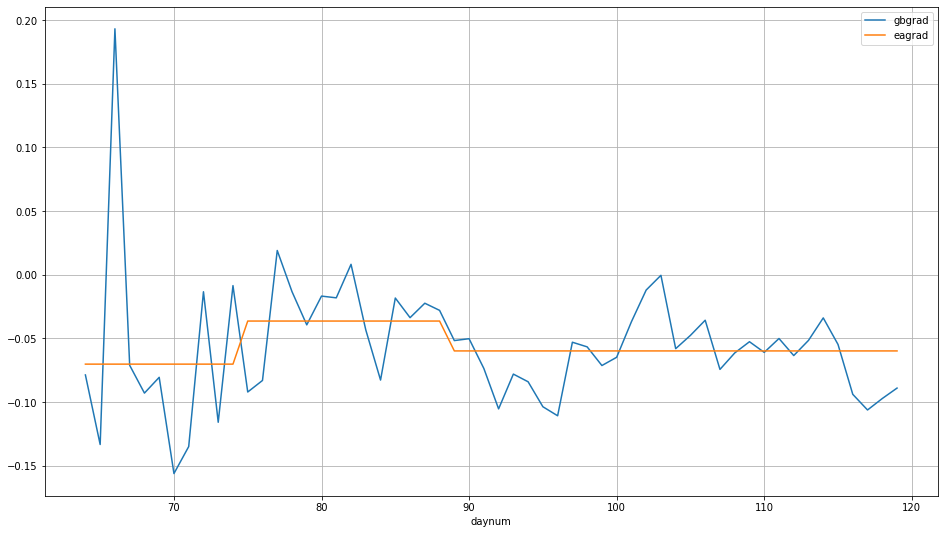

In [15]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

df_pred.loc['20200101':'20200701'].plot(x='daynum', y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [16]:
from pyearth import export
fitmod = export.export_python_function(model)
print(export.export_python_string(model))

def model(example_iterator):
    accessors = [lambda x: -12.385134906453324,
		lambda x: 0.05975728640770821 * max(0, 119.0 - x[0]),
		lambda x: -0.1263642661876707 * max(0, x[0] - 306.0),
		lambda x: 0.07309644552300751 * max(0, 306.0 - x[0]),
		lambda x: 0.027055046111487825 * max(0, x[0] - 266.0),
		lambda x: -0.039178720671910514 * max(0, 290.0 - x[0]),
		lambda x: -0.023470795968262022 * max(0, 88.0 - x[0]),
		lambda x: 0.03385046729300983 * max(0, x[0] - 74.0)]
    for x in example_iterator:
        yield sum(accessor(x) for accessor in accessors)
    


In [17]:
df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                   (df_pred['daynum'] == (daymin + 1)) |
                   (df_pred['daynum'] == daymax))
df_pred['daycount'] = df_pred.reset_index().index
df_pred[df_pred['knot']]

daynum        cases    gumdiv    linear     earth    gbgrad  \
2020-03-04      64     4.000000  0.405797 -0.901902 -0.826834 -0.078702   
2020-03-15      75   110.142857  0.200364 -1.607620 -1.565230 -0.092103   
2020-03-29      89   875.857143  0.131226 -2.030836 -2.097653 -0.051687   
2020-09-21     265  1665.857143  0.018877 -3.969795 -3.902209 -0.007330   
2020-09-22     266  1796.857143  0.019955 -3.914253 -3.902277  0.055542   
2020-09-23     267  1920.714286  0.020885 -3.868702 -3.875289  0.045551   
2020-10-17     291  7157.285714  0.037846 -3.274238 -3.266761  0.002553   
2020-11-02     307  9787.428571  0.029615 -3.519487 -3.515083 -0.052020   
2020-11-09     314  7162.285714  0.018385 -3.996214 -3.973295 -0.076935   

              eagrad  knot  daycount  
2020-03-04 -0.070204  True         1  
2020-03-15 -0.036354  True        12  
2020-03-29 -0.059825  True        26  
2020-09-21 -0.009820  True        57  
2020-09-22 -0.000067  True        58  
2020-09-23  0.026988  True        59  
2020-10-17 -0.012191  True        83  
2020-11-02 -0.065459  True        99  
2020-11-09 -0.065459  True       106

In [18]:
df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum  daycount    eagrad  daysdata  daystime
2020-03-04      64         1 -0.070204      11.0      11.0
2020-03-15      75        12 -0.036354      14.0      14.0
2020-03-29      89        26 -0.059825      31.0     176.0
2020-09-21     265        57 -0.009820       1.0       1.0
2020-09-22     266        58 -0.000067       1.0       1.0
2020-09-23     267        59  0.026988      24.0      24.0
2020-10-17     291        83 -0.012191      16.0      16.0
2020-11-02     307        99 -0.065459       7.0       7.0
2020-11-09     314       106 -0.065459       NaN       NaN

In [19]:
df_knot['cand'] = ((df_knot['daysdata'] >= 3) &
                   (df_knot['eagrad'] < -1/40))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand
2020-03-04      64         1 -0.070204      11.0      11.0   True
2020-03-15      75        12 -0.036354      14.0      14.0   True
2020-03-29      89        26 -0.059825      31.0     176.0   True
2020-09-21     265        57 -0.009820       1.0       1.0  False
2020-09-22     266        58 -0.000067       1.0       1.0  False
2020-09-23     267        59  0.026988      24.0      24.0  False
2020-10-17     291        83 -0.012191      16.0      16.0  False
2020-11-02     307        99 -0.065459       7.0       7.0   True
2020-11-09     314       106 -0.065459       NaN       NaN  False

In [20]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata'] / df_knot['daystime']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-04      64         1 -0.070204      11.0      11.0   True      1   
2020-03-15      75        12 -0.036354      14.0      14.0   True     12   
2020-03-29      89        26 -0.059825      31.0     176.0   True     26   
2020-09-21     265        57 -0.009820       1.0       1.0  False    202   
2020-09-22     266        58 -0.000067       1.0       1.0  False    203   
2020-09-23     267        59  0.026988      24.0      24.0  False    204   
2020-10-17     291        83 -0.012191      16.0      16.0  False    228   
2020-11-02     307        99 -0.065459       7.0       7.0   True    244   
2020-11-09     314       106 -0.065459       NaN       NaN  False    251   

                   score  
2020-03-04  1.634642e-02  
2020-03-15  2.656850e-03  
2020-03-29  8.824626e-03  
2020-09-21  2.557703e-05  
2020-09-22  1.198418e-09  
2020-09-23  9.441319e-04  
2020-10-17  1.529854e-04  
2020-11-02  2.868382e-03  
2020-11-09           NaN

In [21]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-03-04      64         1 -0.070204      11.0      11.0   True      1   
2020-03-15      75        12 -0.036354      14.0      14.0   True     12   
2020-03-29      89        26 -0.059825      31.0     176.0   True     26   
2020-09-21     265        57 -0.009820       1.0       1.0  False    202   
2020-09-22     266        58 -0.000067       1.0       1.0  False    203   
2020-09-23     267        59  0.026988      24.0      24.0  False    204   
2020-10-17     291        83 -0.012191      16.0      16.0  False    228   
2020-11-02     307        99 -0.065459       7.0       7.0   True    244   
2020-11-09     314       106 -0.065459       NaN       NaN  False    251   

                   score  choice  
2020-03-04  1.634642e-02    True  
2020-03-15  2.656850e-03   False  
2020-03-29  8.824626e-03   False  
2020-09-21  2.557703e-05   False  
2020-09-22  1.198418e-09   False  
2020-09-23  9.441319e-04   False  
2020-10-17  1.529854e-04   False  
2020-11-02  2.868382e-03   False  
2020-11-09           NaN   False

In [22]:
choice = df_knot[df_knot['choice']]
lower = choice['daynum'].values[0]
upper = choice['daysdata'].values[0] + lower
print('From {} to {}'.format(lower, upper))

From 64 to 75.0


From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [23]:
#lower = 185
#upper = 187

df_pred = df_pred[(df_pred['daynum'] >= lower) &
                  (df_pred['daynum'] <= upper)].copy()

slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
intercept = fitmod([[lower]])[0] - (lower * slope)

print('From {} to {} with slope {:1.4f} and intercept {:1.3f}'.format(
    lower, upper, slope, intercept))

beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

#final = np.exp(np.log(df_pred['scale']).mean())
final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

From 64 to 75.0 with slope -0.0671 and intercept 3.469
Gumbel beta 14.897 with mu 92 for 10343


In [24]:
df_pred

daynum       cases    gumdiv    linear     earth    gbgrad  \
2020-03-04      64    4.000000  0.405797 -0.901902 -0.826834 -0.078702   
2020-03-05      65    5.428571  0.355140 -1.035243 -0.897039 -0.133341   
2020-03-06      66   11.571429  0.430851 -0.841993 -0.967243  0.193250   
2020-03-07      67   18.000000  0.401274 -0.913111 -1.037447 -0.071118   
2020-03-08      68   25.857143  0.365657 -1.006061 -1.107651 -0.092950   
2020-03-09      69   36.000000  0.337349 -1.086636 -1.177855 -0.080575   
2020-03-10      70   43.285714  0.288571 -1.242813 -1.248060 -0.156177   
2020-03-11      71   50.571429  0.252137 -1.377784 -1.318264 -0.134971   
2020-03-12      72   66.428571  0.248796 -1.391121 -1.388468 -0.013338   
2020-03-13      73   76.000000  0.221574 -1.506997 -1.458672 -0.115876   
2020-03-14      74   96.571429  0.219695 -1.515517 -1.528876 -0.008520   
2020-03-15      75  110.142857  0.200364 -1.607620 -1.565230 -0.092103   

              eagrad   knot  daycount     pgumb         scale  
2020-03-04 -0.070204   True         1  0.000647   6183.378643  
2020-03-05 -0.070204  False         2  0.000923   5878.491363  
2020-03-06 -0.070204  False         3  0.001283   9022.163975  
2020-03-07 -0.070204  False         4  0.001736  10367.979162  
2020-03-08 -0.070204  False         5  0.002294  11270.165574  
2020-03-09 -0.070204  False         6  0.002965  12143.210440  
2020-03-10 -0.070204  False         7  0.003751  11539.228418  
2020-03-11 -0.070204  False         8  0.004654  10865.916707  
2020-03-12 -0.070204  False         9  0.005669  11717.074252  
2020-03-13 -0.070204  False        10  0.006789  11195.343501  
2020-03-14 -0.070204  False        11  0.007999  12072.699562  
2020-03-15 -0.036354   True        12  0.009285  11862.156693

Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

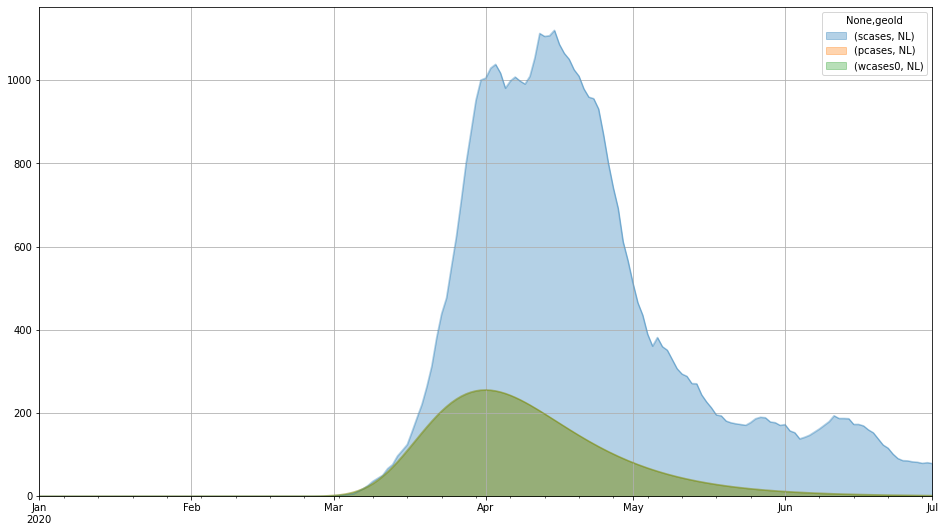

In [25]:
df_geo[(curwave, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
df_geo[plotlist].loc['20200101':'20200701'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

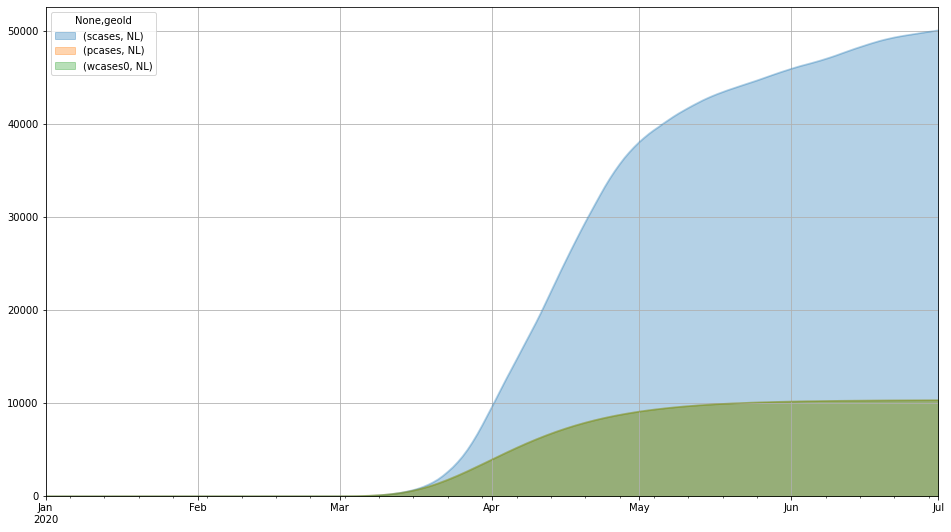

In [26]:
df_geo[plotlist].loc['20200101':'20200701'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [27]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 5924.17% of 10343


The peak can be found at the first predicted value that is larger than the next.

In [28]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-01


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [29]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-03-31


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [30]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-05-26


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [31]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-07


We define the maximum delta as the day in the curve with the sharpest rise.

In [32]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 14 on 2020-03-18


This should match the maximum gradient of the daily data.

In [33]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 14


Back to the original curve, showing the number of infected concurrently.

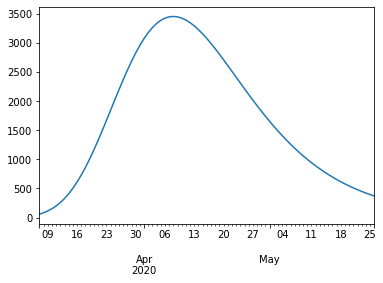

In [34]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [35]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 3450


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

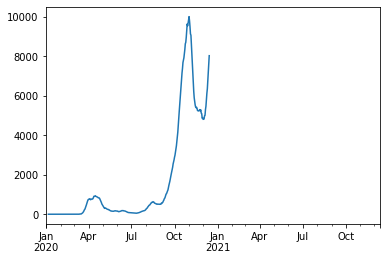

In [36]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [37]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.